# __Title__

If you like this, you may want to experiment with a little markdown.

## __Process__

1. Collection
2. Cleaning
...

### __Collection__

Say something about the data

In [1]:
import pandas as pd

col_names = ["Origin", "Destination", "Origin City", "Destination City", "Passengers", "Seats", "Flights", "Distance",
      "Fly Date", "Origin Population", "Destination Population"]
data = pd.read_csv('flight_edges.tsv', sep="\t", names=col_names)

data

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,MHK,AMW,"Manhattan, KS","Ames, IA",1,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034
...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119.0,200902,2828990,46457
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119.0,200911,2828990,46457
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119.0,200908,2828990,46457
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146.0,200908,93712,46457


*__Converting month and year to datetime objects and setting them as the index.__*

In [2]:
data.loc[:, "Fly Date"] = pd.to_datetime(data.loc[:, "Fly Date"].copy(), format="%Y%m")
data.set_index("Fly Date", inplace=True)
data = data.sort_index()

data

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,SEA,ORD,"Seattle, WA","Chicago, IL",1713,4410,30,1721.0,5154164,16395048
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1476,4619,31,404.0,2103367,16868983
1990-01-01,CRW,ROA,"Charleston, WV","Roanoke, VA",388,2100,21,114.0,307480,269195
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1337,3348,31,404.0,2103367,16868983
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...,...,...,...,...
2009-12-01,CLE,CLT,"Cleveland, OH","Charlotte, NC",513,600,12,430.0,2091286,1745524
2009-12-01,CLE,CLT,"Cleveland, OH","Charlotte, NC",944,1150,23,430.0,2091286,1745524
2009-12-01,SAT,DRT,"San Antonio, TX","Del Rio, TX",0,0,39,152.0,2072128,48165


In [3]:
data['Passengers'].max()

89597

In [4]:
data.loc['1990']

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,SEA,ORD,"Seattle, WA","Chicago, IL",1713,4410,30,1721.0,5154164,16395048
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1476,4619,31,404.0,2103367,16868983
1990-01-01,CRW,ROA,"Charleston, WV","Roanoke, VA",388,2100,21,114.0,307480,269195
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1337,3348,31,404.0,2103367,16868983
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...,...,...,...,...
1990-12-01,BDL,PIT,"Hartford, CT","Pittsburgh, PA",152,200,2,406.0,1124185,2468674
1990-12-01,SEA,LAX,"Seattle, WA","Los Angeles, CA",391,640,5,954.0,5154164,22585772
1990-12-01,JFK,RDU,"New York, NY","Raleigh, NC",41,118,1,426.0,33737966,548230


In [5]:
data.query('index == 1990')

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,SEA,ORD,"Seattle, WA","Chicago, IL",1713,4410,30,1721.0,5154164,16395048
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1476,4619,31,404.0,2103367,16868983
1990-01-01,CRW,ROA,"Charleston, WV","Roanoke, VA",388,2100,21,114.0,307480,269195
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1337,3348,31,404.0,2103367,16868983
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...,...,...,...,...
1990-01-01,ORD,CLE,"Chicago, IL","Cleveland, OH",512,1662,16,316.0,16395048,2103367
1990-01-01,CHA,GSO,"Chattanooga, TN","Greensboro, NC",28,63,1,305.0,433423,541858
1990-01-01,GSO,RDU,"Greensboro, NC","Raleigh, NC",88,603,5,67.0,541858,548230


In [6]:
data.loc['1990']['Passengers'].max()

54564

*__Resampling__*

In [7]:
num_cols = ['Passengers', 'Seats', 'Flights', 'Distance', 'Origin Population', 'Destination Population']
data_yearly_max = data[num_cols].resample('Y').max()

data_yearly_max

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-12-31,54564,88094,624,4983.0,33737966,33737966
1991-12-31,63604,99592,844,4983.0,33749684,33749684
1992-12-31,54395,96744,707,4502.0,33861848,33861848
1993-12-31,67354,93825,716,4502.0,34026518,34026518
1994-12-31,83153,147062,1128,4862.0,34144436,34144436
1995-12-31,82298,140946,1044,4983.0,34261384,34261384
1996-12-31,76554,130938,942,5018.0,34380072,34380072
1997-12-31,70514,115370,830,4502.0,34528632,34528632
1998-12-31,73703,112402,893,4983.0,34683010,34683010


In [8]:
data_yearly_mean = data[num_cols].resample('Y').mean()

data_yearly_mean

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-12-31,2588.756182,4658.978935,35.624579,644.415063,5.839990e+06,5.892388e+06
1991-12-31,2549.077809,4548.894357,35.395525,648.015836,5.836108e+06,5.863512e+06
1992-12-31,2615.470128,4588.220197,35.944255,650.115987,5.982175e+06,5.995151e+06
1993-12-31,2694.244565,4665.995522,36.967815,655.180401,5.986772e+06,6.048870e+06
1994-12-31,2889.648744,4754.085252,38.316272,662.936732,5.871819e+06,5.936238e+06
1995-12-31,3037.455453,4945.799010,41.758974,666.925485,5.743808e+06,5.725043e+06
1996-12-31,3075.688037,4779.466659,40.777504,676.681898,5.695619e+06,5.731503e+06
1997-12-31,3178.347018,4877.249596,40.940928,693.292523,5.785903e+06,5.772043e+06
1998-12-31,3227.698704,4856.540146,41.023490,700.691493,5.892154e+06,5.898313e+06


In [9]:
data_monthly_mean = data[num_cols].resample('M').mean()

data_monthly_mean

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-01-31,2291.453308,4610.214991,35.059849,649.786254,5.886629e+06,5.951160e+06
1990-02-28,2277.277380,4206.596746,32.034483,647.897901,5.867701e+06,5.807857e+06
1990-03-31,2801.016662,4800.271444,36.510414,649.082122,5.838691e+06,5.796940e+06
1990-04-30,2754.200707,4871.893640,37.104152,650.161219,5.902578e+06,5.809447e+06
1990-05-31,2571.354100,4681.915616,35.889328,630.070705,5.820051e+06,5.928812e+06
...,...,...,...,...,...,...
2009-08-31,2764.142824,3479.438377,36.213865,711.958040,6.281118e+06,6.416520e+06
2009-09-30,2473.780803,3315.254922,34.770331,716.084256,6.246446e+06,6.234258e+06
2009-10-31,2619.854094,3351.338218,35.017213,714.905559,6.155436e+06,6.108220e+06


In [10]:
data_3m_roll = data_monthly_mean[num_cols].rolling(window=3, center=True).mean()

data_3m_roll

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,2456.582450,4539.027727,34.534915,648.922092,5.864341e+06,5.851985e+06
1990-03-31,2610.831583,4626.253943,35.216350,649.047081,5.869657e+06,5.804748e+06
1990-04-30,2708.857156,4784.693567,36.501298,643.104682,5.853773e+06,5.845066e+06
1990-05-31,2685.557307,4724.036297,36.135111,643.166368,5.856120e+06,5.883254e+06
...,...,...,...,...,...,...
2009-08-31,2734.732522,3469.550823,36.237844,713.671698,6.279770e+06,6.378209e+06
2009-09-30,2619.259240,3382.010506,35.333803,714.315952,6.227667e+06,6.252999e+06
2009-10-31,2497.849322,3284.656013,34.333346,719.448572,6.178192e+06,6.164067e+06


In [11]:
data_monthly_mean = data[num_cols].groupby(data.index).mean()

data_monthly_mean

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-01-01,2291.453308,4610.214991,35.059849,649.786254,5.886629e+06,5.951160e+06
1990-02-01,2277.277380,4206.596746,32.034483,647.897901,5.867701e+06,5.807857e+06
1990-03-01,2801.016662,4800.271444,36.510414,649.082122,5.838691e+06,5.796940e+06
1990-04-01,2754.200707,4871.893640,37.104152,650.161219,5.902578e+06,5.809447e+06
1990-05-01,2571.354100,4681.915616,35.889328,630.070705,5.820051e+06,5.928812e+06
...,...,...,...,...,...,...
2009-08-01,2764.142824,3479.438377,36.213865,711.958040,6.281118e+06,6.416520e+06
2009-09-01,2473.780803,3315.254922,34.770331,716.084256,6.246446e+06,6.234258e+06
2009-10-01,2619.854094,3351.338218,35.017213,714.905559,6.155436e+06,6.108220e+06


Text(0.5, 1.0, 'Passenger Trends')

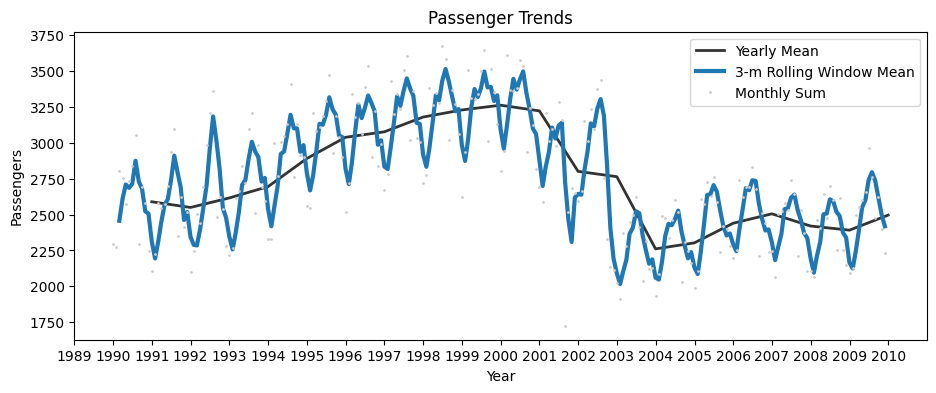

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(11, 4))

# plot yearly mean data
ax.plot(data_yearly_mean['Passengers'], color='0.2', linewidth=2, label='Yearly Mean')

# plot monthly rolling mean
ax.plot(data_3m_roll['Passengers'], linewidth=3, label='3-m Rolling Window Mean')

# plot monthly sums
ax.plot(data_monthly_mean['Passengers'], marker='.', markersize=2, color='0.8', linestyle='None', label='Monthly Sum')

# Pretty it up
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
ax.set_title('Passenger Trends')